In [373]:
# Import Packages #
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from mlxtend.plotting import plot_decision_regions
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
from collections import Counter
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [374]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [415]:
## Synthetic Minority Over Sampling ##
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X,y)

In [405]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size=0.20, random_state=42)

In [406]:
# Logistic Regression #
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
s=model.score(X_train,y_train)
s

0.8404517177389114

In [407]:
y_pred = model.predict(X_test)

In [408]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

accuracy_score1=accuracy_score(y_test,y_pred)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy for this model is: 84.06%
Default threshold:
Precision: 0.9145,   Recall: 0.7521,   f1-score:0.8254


ROC AUC score =  0.8407873629174186


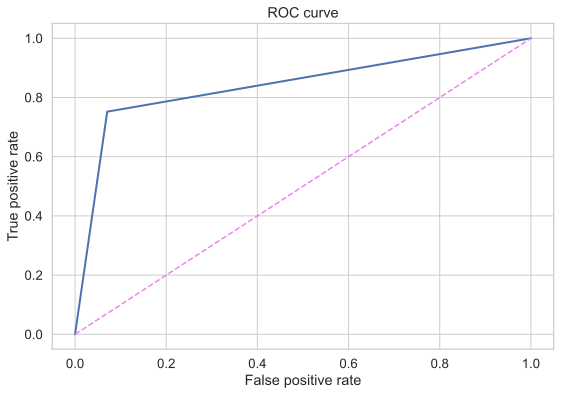

In [409]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test,y_pred))

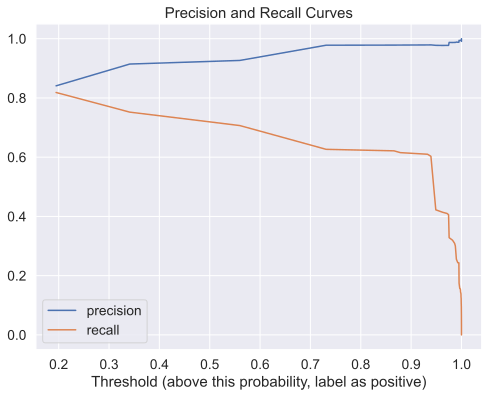

In [326]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1] )
plt.figure(figsize=(8, 6),dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as positive)');
plt.title('Precision and Recall Curves');

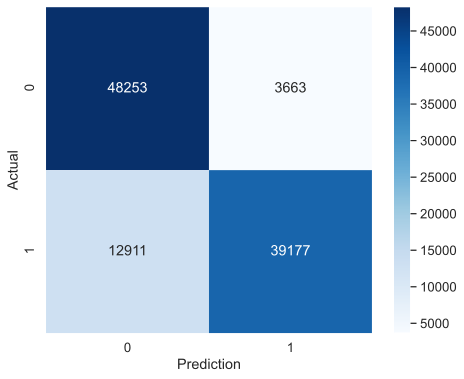

In [410]:
from sklearn.metrics import confusion_matrix
conf_m=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6),dpi=80)
sns.heatmap(conf_m,cmap=plt.cm.Blues,annot=True,square=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual');
plt.savefig('confusion.png')

In [414]:
# using the new threshold of 0.2
y_predt = (model.predict_proba(X_test)[:,1] > 0.3)
print("Threshold of 0.2:")
accuracy_score1=accuracy_score(y_test,y_predt)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_predt), 
                                                     recall_score(y_test, y_pred),f1_score(y_test, y_predt)))

Threshold of 0.2:
Accuracy for this model is: 83.16%
Default threshold:
Precision: 0.8410,   Recall: 0.7521,   f1-score:0.8296


ROC AUC score =  0.825327802011943


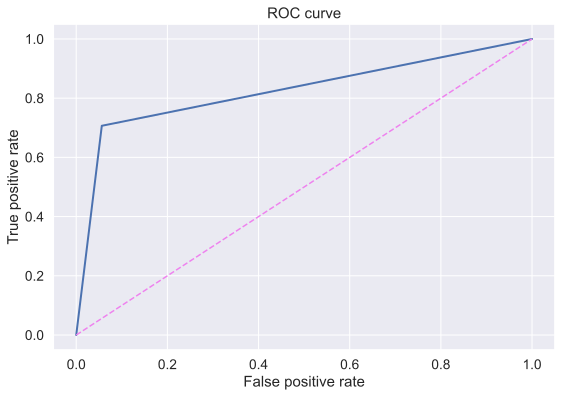

In [342]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predt)

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test,y_predt))

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predt)

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test,y_predt))

Logistic: ROC AUC=0.878


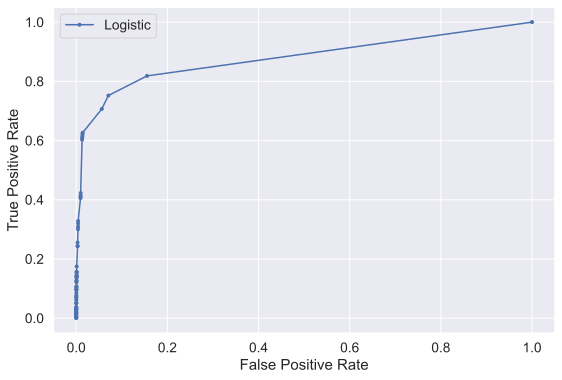

In [252]:
from matplotlib import pyplot
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
## Naive Bayes - Bernoulli ##

In [416]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size=0.20, random_state=42)

nb = BernoulliNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.8406407445867466

In [330]:
y_pred1 = nb.predict(X_test)

In [334]:
accuracy_score1=accuracy_score(y_test,y_pred1)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_pred1), 
                                                     recall_score(y_test, y_pred1),f1_score(y_test, y_pred1)))

Accuracy for this model is: 84.06%
Default threshold:
Precision: 0.9145,   Recall: 0.7521,   f1-score:0.8254


ROC AUC score =  0.8407873629174186


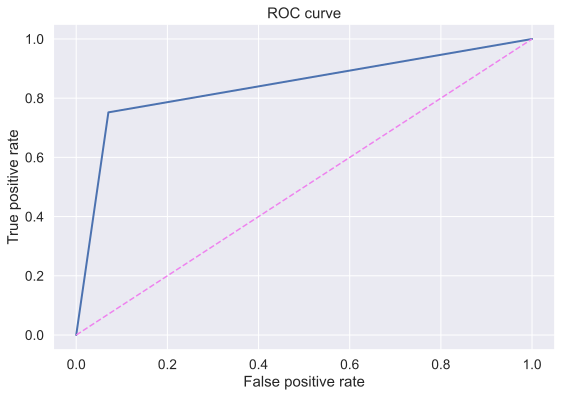

In [332]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test,y_pred))

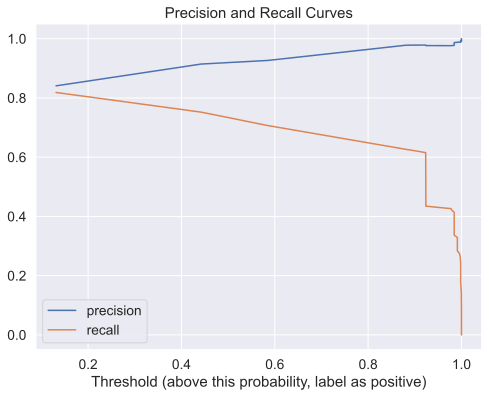

In [333]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, nb.predict_proba(X_test)[:,1] )
plt.figure(figsize=(8, 6),dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as positive)');
plt.title('Precision and Recall Curves');

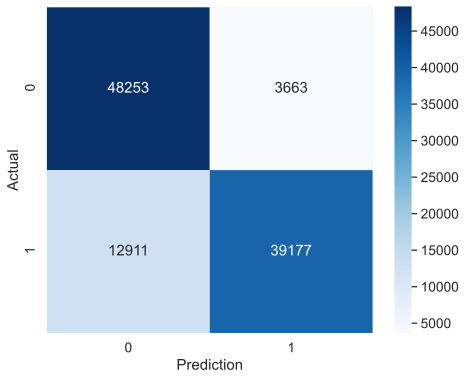

In [268]:
from sklearn.metrics import confusion_matrix
conf_m=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6),dpi=80)
sns.heatmap(conf_m,cmap=plt.cm.Blues,annot=True,square=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [403]:
y_predt = (nb.predict_proba(X_test)[:,1] > 0.15)
print("Threshold of 0.15:")
accuracy_score1=accuracy_score(y_test,y_predt)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_predt), 
                                                     recall_score(y_test, y_predt),f1_score(y_test, y_predt)))

Threshold of 0.15:
Accuracy for this model is: 83.16%
Default threshold:
Precision: 0.8410,   Recall: 0.8184,   f1-score:0.8296


Logistic: ROC AUC=0.878


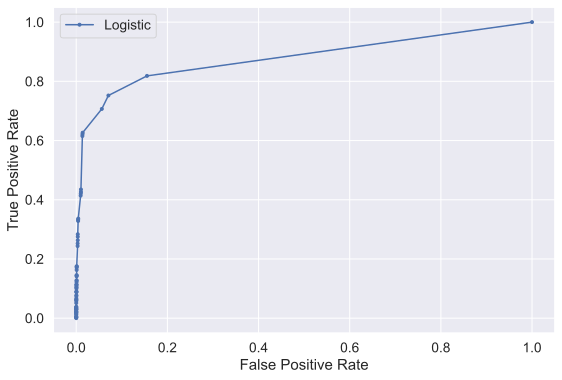

In [272]:
from matplotlib import pyplot
lr_probs = nb.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
## Random Forest ##

In [362]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', n_estimators= 100)
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [363]:
y_pred_r = rfc1.predict(X_test)

In [364]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

accuracy_score1=accuracy_score(y_test,y_pred_r)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_pred_r), 
                                                     recall_score(y_test, y_pred_r),f1_score(y_test, y_pred_r)))

Accuracy for this model is: 84.06%
Default threshold:
Precision: 0.9145,   Recall: 0.7521,   f1-score:0.8254


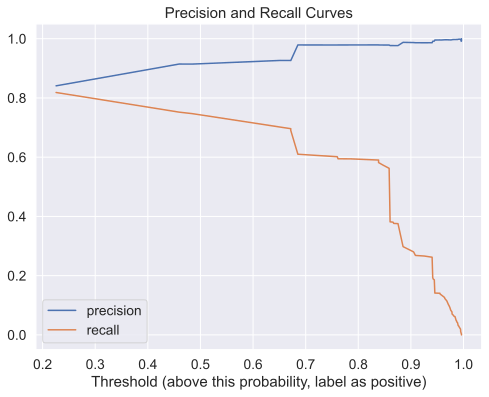

In [285]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rfc1.predict_proba(X_test)[:,1] )
plt.figure(figsize=(8, 6),dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as positive)');
plt.title('Precision and Recall Curves');

In [365]:
y_pred_r = (rfc1.predict_proba(X_test)[:,1] > 0.4)
print("Threshold of 0.4:")
accuracy_score1=accuracy_score(y_test,y_pred_r)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_pred_r), 
                                                     recall_score(y_test, y_pred_r1),f1_score(y_test, y_pred_r)))

Threshold of 0.4:
Accuracy for this model is: 83.16%
Default threshold:
Precision: 0.8410,   Recall: 0.8184,   f1-score:0.8296


ROC AUC score =  0.8315859079934058


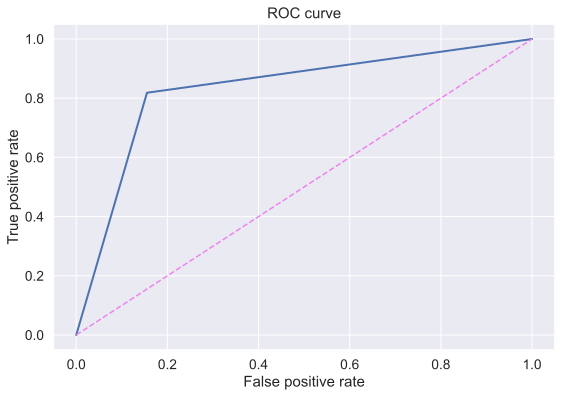

In [367]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_r)

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test,y_pred_r))

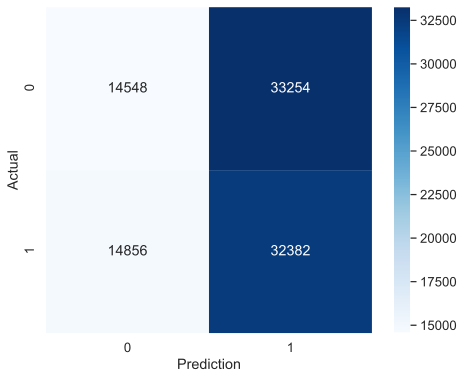

In [127]:
from sklearn.metrics import confusion_matrix
conf_m=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6),dpi=80)
sns.heatmap(conf_m,cmap=plt.cm.Blues,annot=True,square=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [ ]:
## XGBoost ###

In [313]:
import xgboost as xgb

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [368]:
gbm = xgb.XGBClassifier( 
        n_estimators=30000,
        max_depth=4,
        objective='binary:logistic', #new objective
        use_label_encoder=False,
        learning_rate=.05, 
        subsample=.8,
        min_child_weight=3,
        colsample_bytree=.8)

eval_set=[(X_train,y_train),(X_val,y_val)]

fit_model = gbm.fit(
                X_train, y_train, 
                eval_set=eval_set,
                eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                early_stopping_rounds=50,
                verbose=False)

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))

[09:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.8406407445867466

In [371]:
y_pred = gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)

In [372]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

accuracy_score1=accuracy_score(y_test,y_pred)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred),f1_score(y_test, y_pred)))

Accuracy for this model is: 84.06%
Default threshold:
Precision: 0.9145,   Recall: 0.7521,   f1-score:0.8254


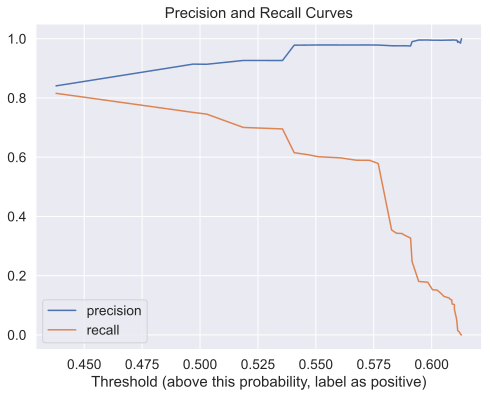

In [318]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, gbm.predict_proba(X_test)[:,1] )
plt.figure(figsize=(8, 6),dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as positive)');
plt.title('Precision and Recall Curves');

ROC AUC score =  0.8764313834939665


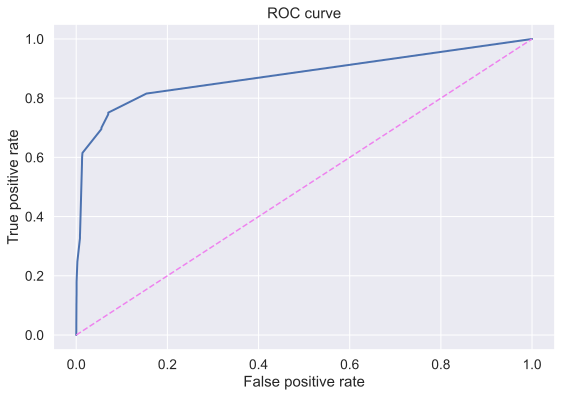

In [319]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))

In [345]:
y_pred_xg = (gbm.predict_proba(X_test)[:,1] > 0.45)
print("Threshold of 0.4:")
accuracy_score1=accuracy_score(y_test,y_pred_xg)

print("Accuracy for this model is:{:6.2f}%".format(100*accuracy_score1))
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f},   f1-score:{:6.4f}".format(precision_score(y_test, y_pred_xg), 
                                                     recall_score(y_test, y_pred_xg),f1_score(y_test, y_pred_xg)))

Threshold of 0.4:
Accuracy for this model is: 83.16%
Default threshold:
Precision: 0.8410,   Recall: 0.8184,   f1-score:0.8296


ROC AUC score =  0.8315859079934058


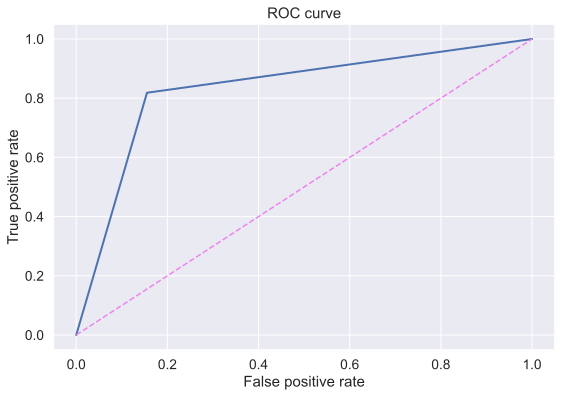

In [346]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg)

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, y_pred_xg))

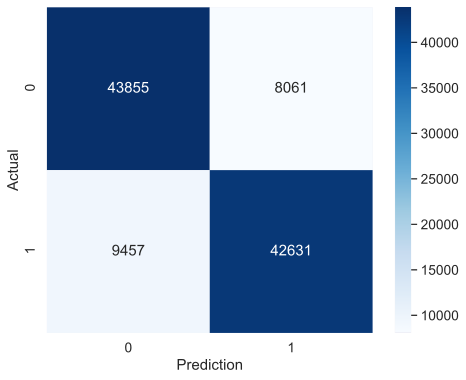

In [351]:
from sklearn.metrics import confusion_matrix
conf_m=confusion_matrix(y_test,y_pred_xg)
plt.figure(figsize=(8, 6),dpi=200)
sns.heatmap(conf_m,cmap=plt.cm.Blues,annot=True,square=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual');
plt.savefig('confusion.png')

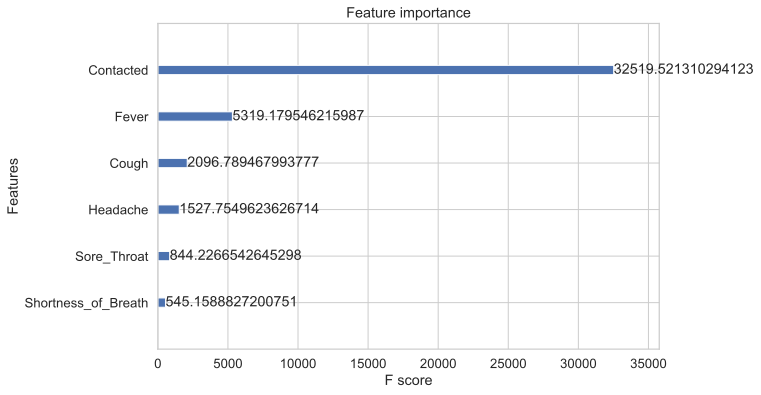

In [399]:
xgb.plot_importance(gbm, importance_type='gain')
plt.savefig('FI.png')